#  Extrovert vs. Introvert Personality Prediction using Logistic Regression

##  Problem Statement

Use the **Extrovert vs. Introvert Personality Traits Dataset** to build a binary classification model using **Logistic Regression** that predicts whether a person is an **extrovert** or not.

---

##  Step-by-Step Tasks

### 1. Data Loading & Basic Exploration
- Load the dataset using `pandas`.
- View the first few rows and check column names and data types.
- Check the shape of the dataset (rows × columns).

### 2. Data Cleaning
-  Check and handle **missing values** (nulls).
-  Remove any **duplicate rows**.
-  Detect and treat **outliers** using:
  - `sns.boxplot()` for each feature
  - IQR method (optional)
-  Analyze the **distribution** of each numerical feature using:
  - `sns.histplot()` or `sns.kdeplot()` (previously `distplot`)

### 3. Target Variable Encoding
- Encode the `Personality` column:
  - `Extrovert` → 1  
  - `Introvert` → 0

### 4. Define Features and Target
-  **Target Variable:**  
  - `Personality` (binary: 0 or 1)

-  **Feature Variables:**  
  - `Time_spent_Alone`  
  - `Stage_fear`  
  - `Social_event_attendance`  
  - `Going_outside`  
  - `Drained_after_socializing`  
  - `Friends_circle_size`  
  - `Post_frequency`

### 5. Exploratory Data Analysis (EDA)

-  **Distribution Plots:**
  - Use `sns.histplot()` or `sns.kdeplot()` to check how each feature is distributed.
  - Helps understand skewness and variability.

-  **Box Plots:**
  - Use `sns.boxplot()` to identify outliers in each feature.
  - Also use boxplot to compare each feature across personality types (0 vs. 1).

-  **Scatter Plots:**
  - Use `sns.scatterplot()` to visualize relationships between pairs of features.
  - Use `hue='Personality'` to color by class.

-  **Heatmap (Correlation Matrix):**
  - Use `sns.heatmap()` to visualize correlation between features.
  - Identify strongly correlated features.

-  **Feature vs. Target Relationship:**
  - Use `boxplot` grouped by `Personality` to see feature impact.
  - Use `groupby('Personality').mean()` to summarize feature differences.

### 6. Feature Scaling
- Use `StandardScaler` from `sklearn.preprocessing` to scale numerical features.
-  **Important:** Perform **VIF calculation after scaling** the features.

### 7. Multicollinearity Check
-  Use **VIF (Variance Inflation Factor)** to detect multicollinearity.
-  **Note:** VIF is applied only on **feature variables**, not the target.
- Drop or combine features with **VIF > 5** if needed.

### 8. Train-Test Split
- Use `train_test_split()` to split data:
  - 80% for training
  - 20% for testing
- Use `random_state` for reproducibility.

### 9. Model Building
- Use `LogisticRegression` from `sklearn.linear_model` to train the model.
- Fit the model on the training set.

### 10. Model Evaluation
- Evaluate model performance using:
  -  `accuracy_score`
  -  `confusion_matrix`
  - `Training and Testng Score`
---

##  Final Goal

Build a clean and accurate logistic regression model that predicts whether a person is an **extrovert or introvert**, based on their social behavior and personality traits.


## Objective

### Problem Statement

**Predict the Personality Type** using various features such as:
- `Time_spent_Alone`
- `Stage_fear`
- `Social_event_attendance`
- `Going_outside`
- `Drained_after_socializing`
- `Friends_circle_size`
- `Post_frequency`


## Dataset Description

### Dataset Description

| **Column Name**             | **Description**                                               |
|-----------------------------|---------------------------------------------------------------|
| `Time_spent_Alone`          | Hours typically spent alone in a day                          |
| `Stage_fear`                | Degree of fear in public speaking situations (numeric scale)  |
| `Social_event_attendance`   | Frequency of attending social events (e.g., weekly count)     |
| `Going_outside`             | Likelihood of going outside often (numeric or frequency)      |
| `Drained_after_socializing`| Energy level after social interaction (higher = more drained) |
| `Friends_circle_size`       | Number of close friends or average circle size                |
| `Post_frequency`            | Frequency of social media posts per week/month                |
| `Personality`               | Target variable - Extrovert = 1, Introvert = 0                |


## Features and Label

### Features and Label

**Features (X):**
- `Time_spent_Alone`
- `Stage_fear`
- `Social_event_attendance`
- `Going_outside`
- `Drained_after_socializing`
- `Friends_circle_size`
- `Post_frequency`

**Label (y):**
- `Personality`
  - `Extrovert` = 1  
  - `Introvert` = 0


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

# For Regression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix ,roc_auc_score

In [12]:
data=pd.read_csv('Personality_Dataset.csv')

In [13]:
data.head()

,Unnamed: 0,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,4.0,No,4.0,6.0,No,13.0,5.0,1
1,1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,0
2,2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,0
3,3,0.0,No,6.0,7.0,No,14.0,8.0,1
4,4,3.0,No,9.0,4.0,No,8.0,5.0,1


In [14]:
data.shape

(2900, 9)

In [15]:

data.describe()

,Unnamed: 0,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality
count,2900.000000,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000,2900.000000
mean,1449.500000,4.505816,3.963354,3.000000,6.268863,3.564727,0.514138
std,837.302215,3.479192,2.903827,2.247327,4.289693,2.926582,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,724.750000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000
50%,1449.500000,4.000000,3.000000,3.000000,5.000000,3.000000,1.000000
75%,2174.250000,8.000000,6.000000,5.000000,10.000000,6.000000,1.000000
max,2899.000000,11.000000,10.000000,7.000000,15.000000,10.000000,1.000000


In [16]:
data.isnull().sum()

Unnamed: 0                    0
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [17]:
# Apply fillna(0) only to all columns except 'Personality'
data.loc[:, data.columns != 'Personality'] = data.loc[:, data.columns != 'Personality'].fillna(0)

In [18]:
data.isnull().sum()

Unnamed: 0                   0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [19]:

data.drop(columns=['Unnamed: 0'], inplace=True)

In [20]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,1
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,0
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,0
3,0.0,No,6.0,7.0,No,14.0,8.0,1
4,3.0,No,9.0,4.0,No,8.0,5.0,1


In [21]:
data.duplicated().sum()

439

In [22]:
data.drop_duplicates(inplace=True)

In [23]:
data.duplicated().sum()

0

In [24]:
data.shape

(2461, 8)

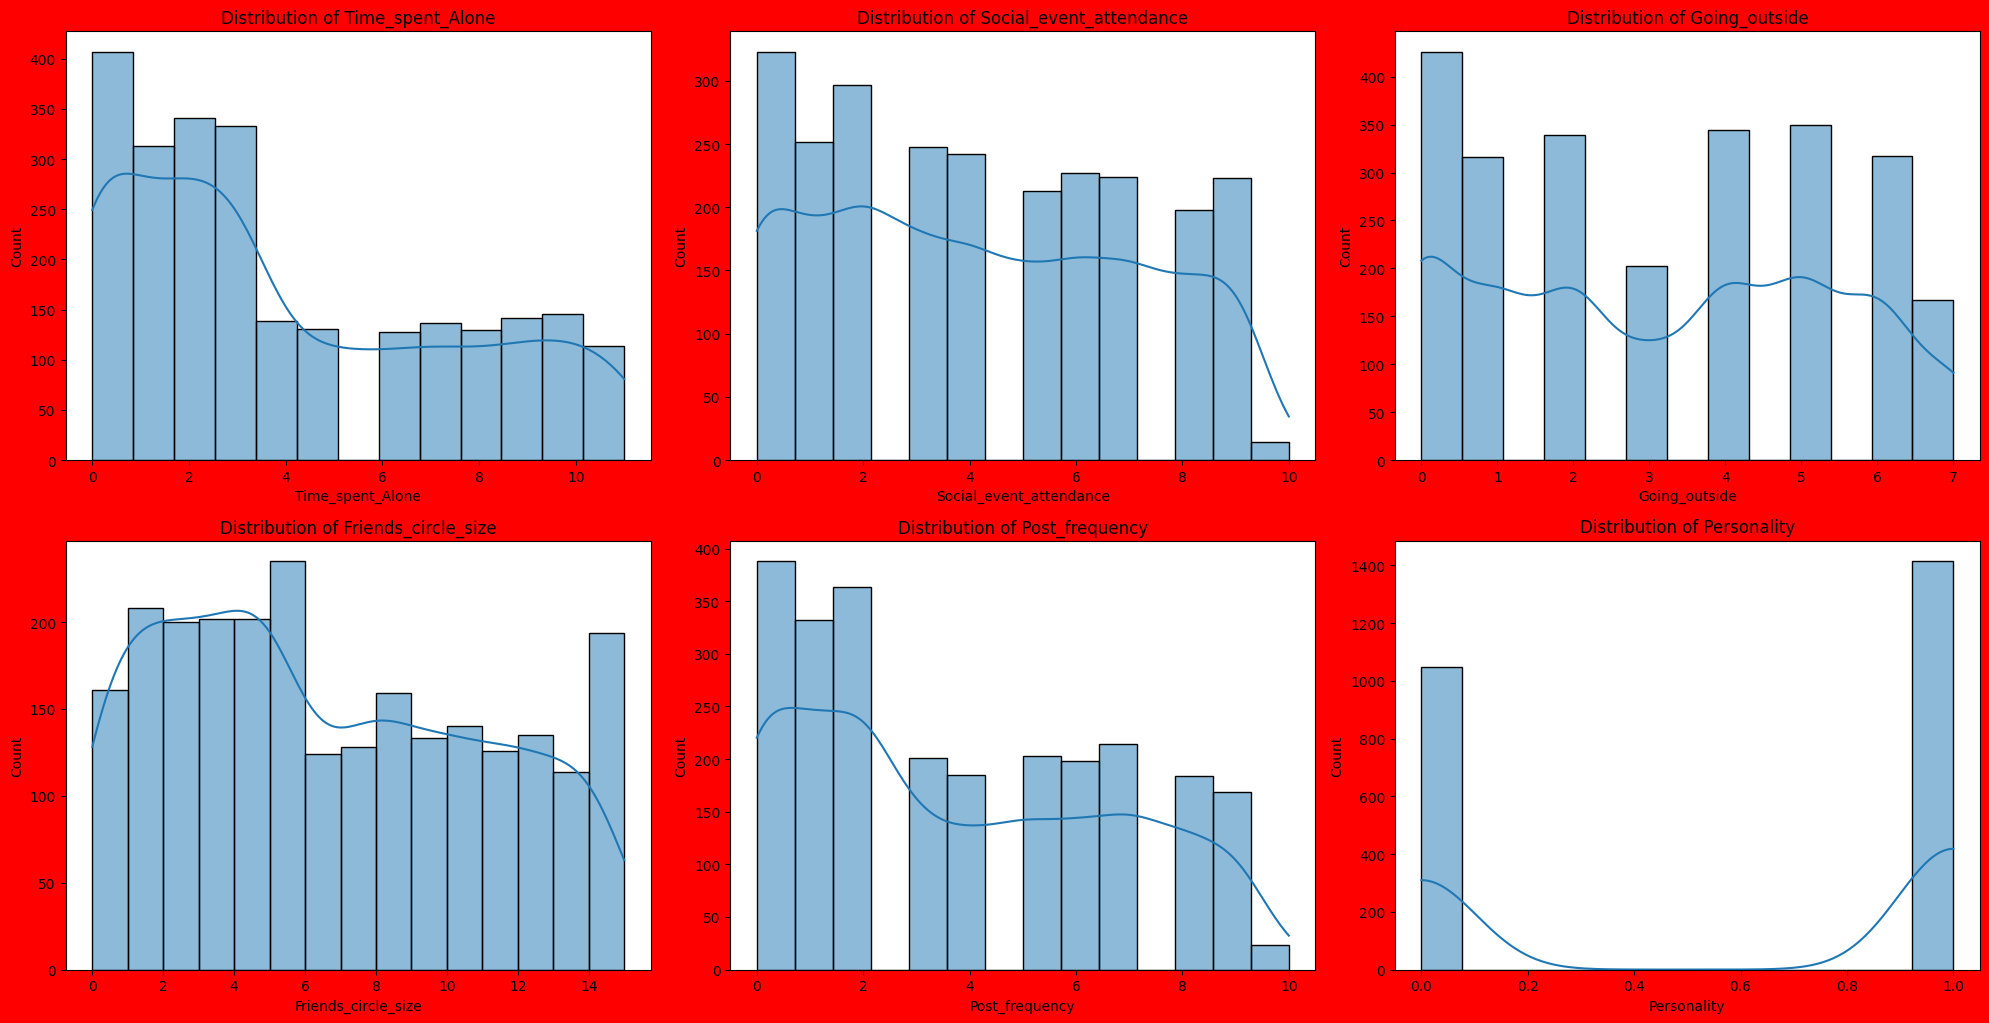

NameError: name 't' is not defined

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(20, 15), facecolor='red')
graph = 1

# Loop only through numeric columns
for column in data.select_dtypes(include='number').columns:
    if graph <= 9:
        ax = plt.subplot(3, 3, graph)
        sns.histplot(data[column], kde=True, ax=ax)
        ax.set_xlabel(column)
        ax.set_title(f'Distribution of {column}')
        graph += 1

plt.tight_layout()
plt.show()
t.show()

In [28]:
data['Time_spent_Alone'] = data['Time_spent_Alone'].replace(0, data['Time_spent_Alone'].mean())
data['Social_event_attendance'] = data['Social_event_attendance'].replace(0, data['Social_event_attendance'].mean())
data['Going_outside'] = data['Going_outside'].replace(0, data['Going_outside'].mean())
data['Friends_circle_size'] = data['Friends_circle_size'].replace(0, data['Friends_circle_size'].mean())
data['Post_frequency'] = data['Post_frequency'].replace(0, data['Post_frequency'].mean())
data['Stage_fear'] = data['Stage_fear'].map({'Yes': 1, 'No': 0})
data['Drained_after_socializing'] = data['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

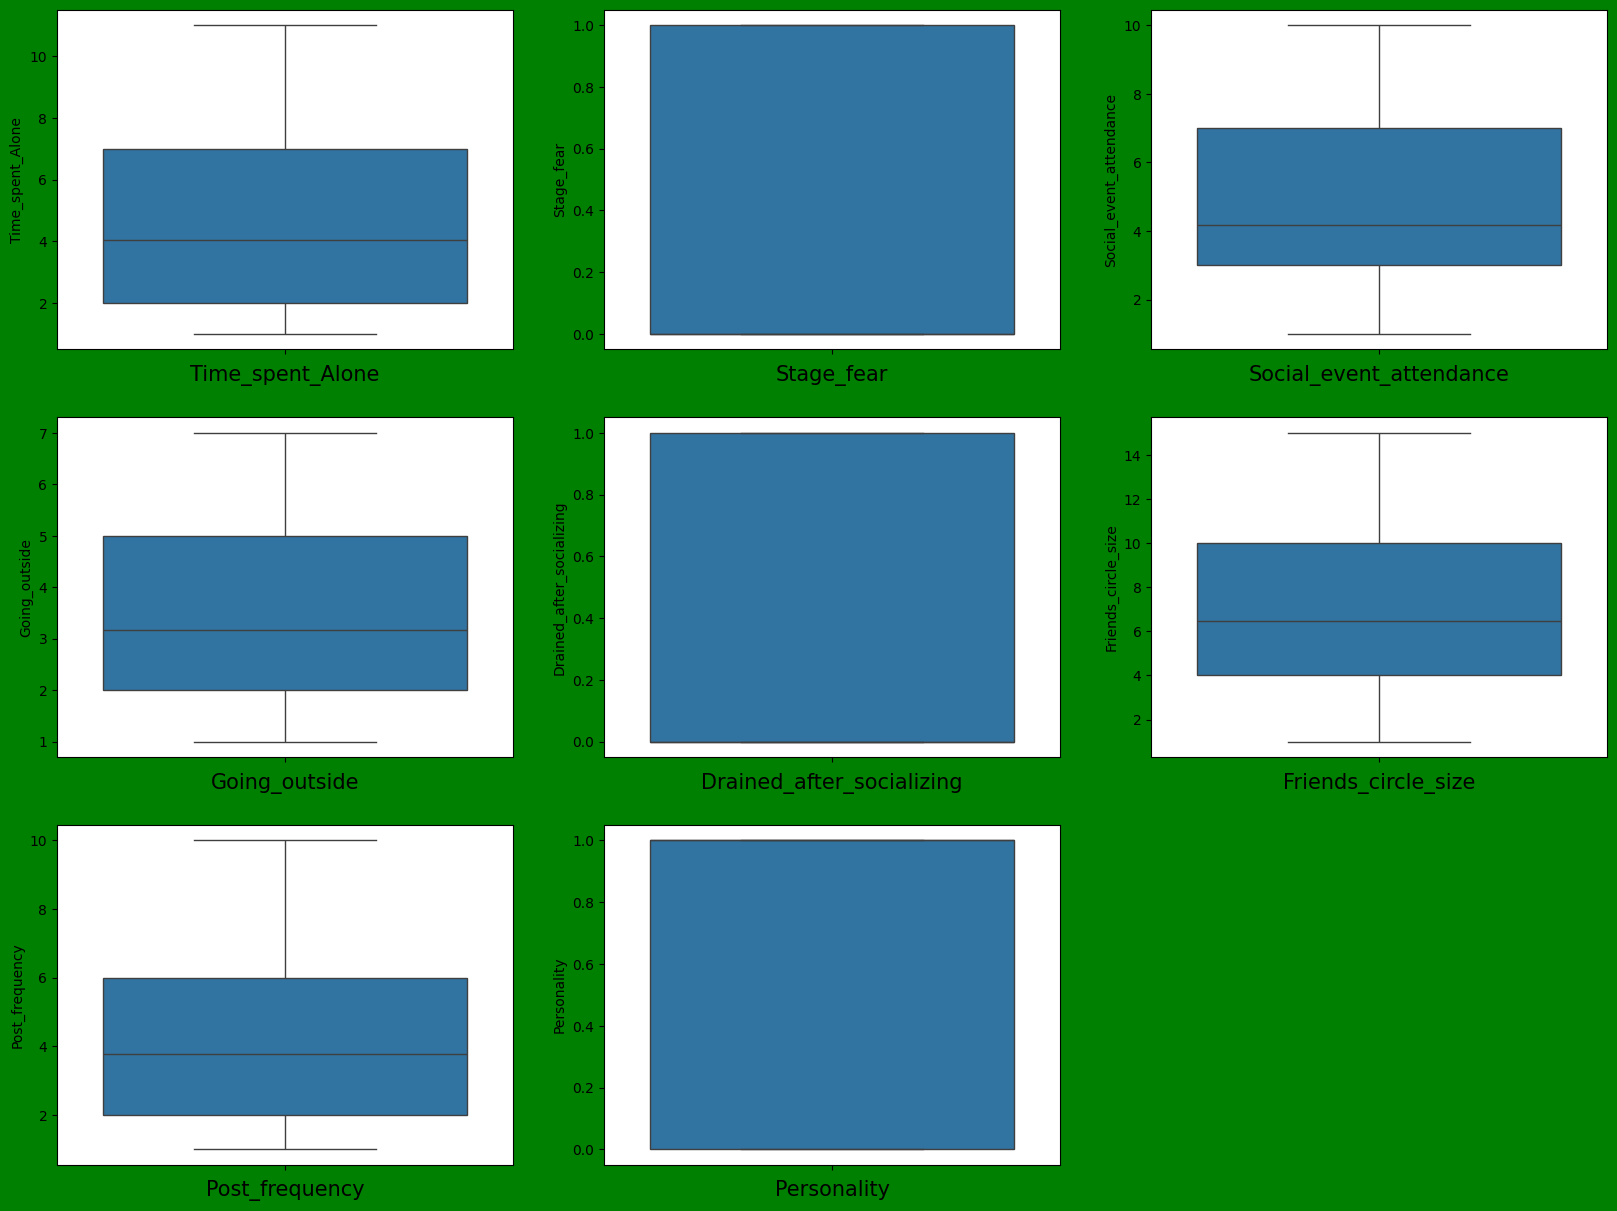

In [29]:
plt.figure(figsize=(20,15),facecolor='green')
plotnumber=1
for column in data:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.show()

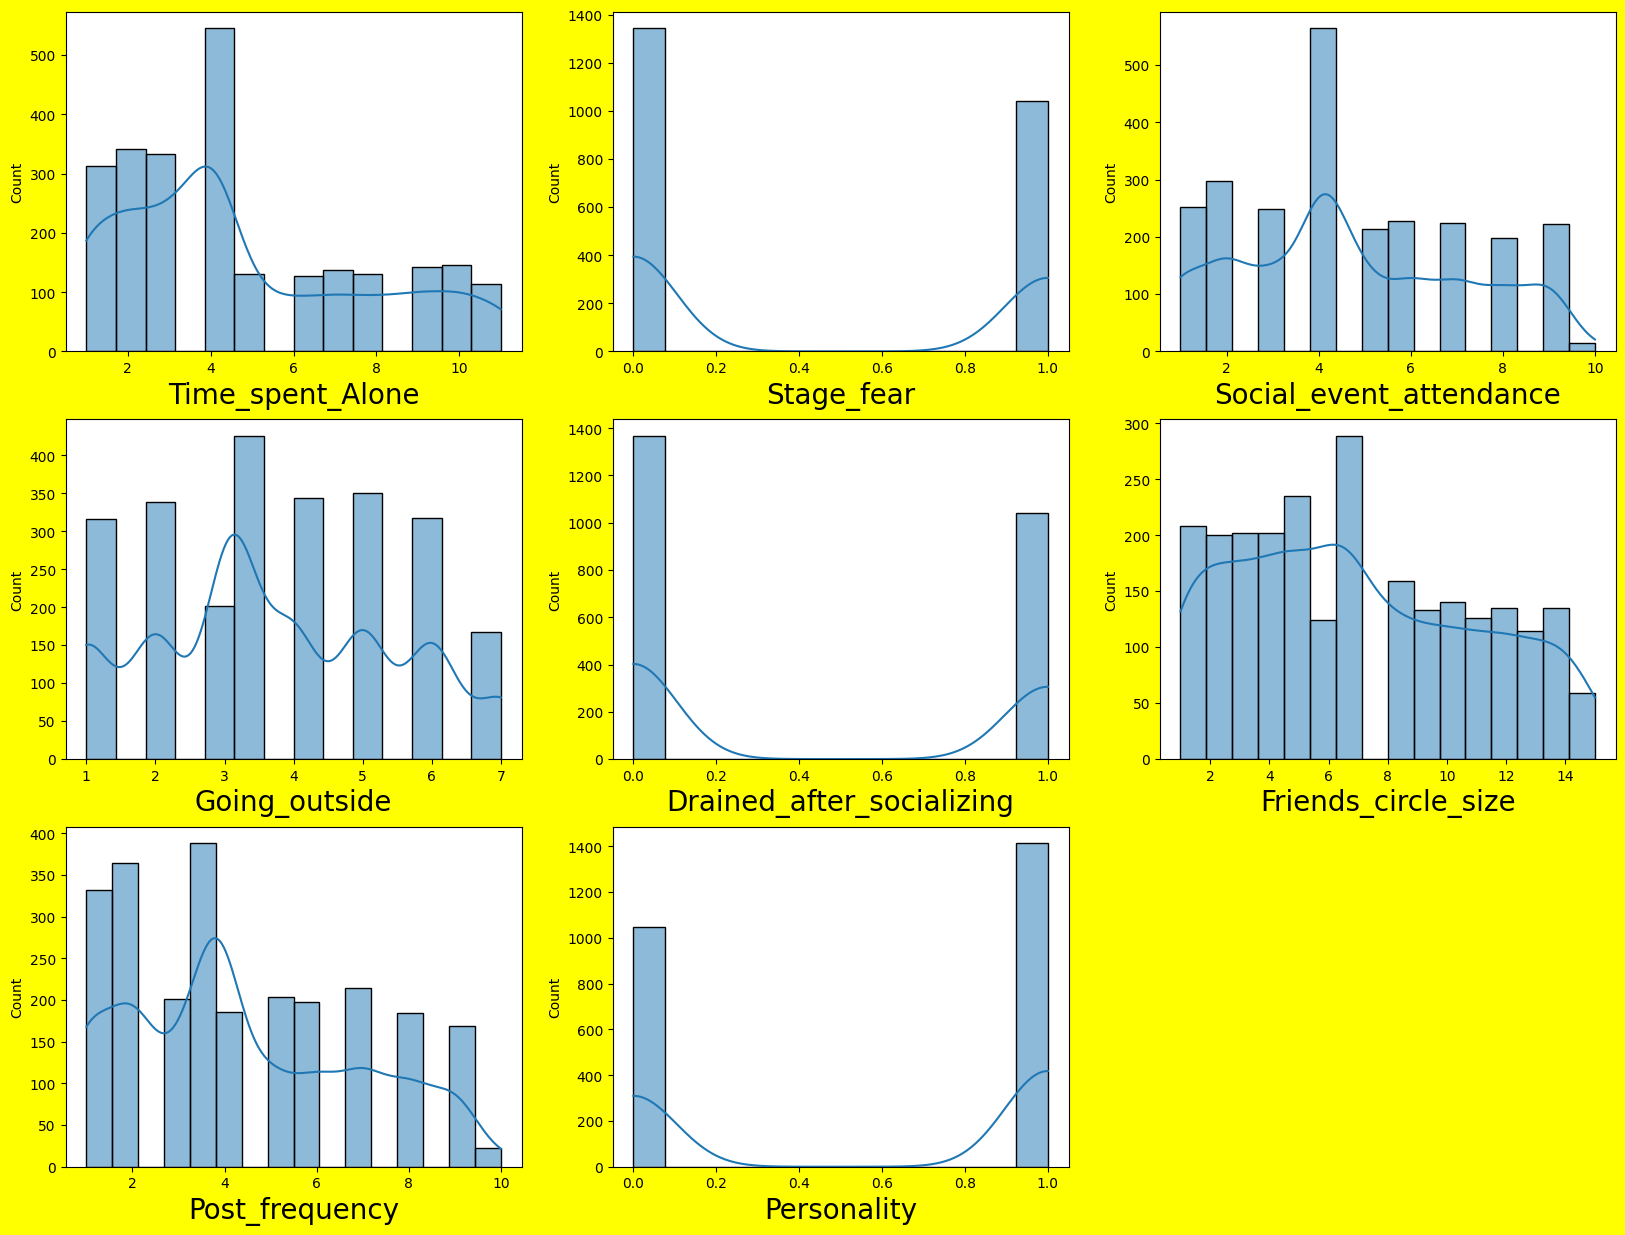

In [30]:
numeric_columns = data.select_dtypes(include=['number']).columns

plt.figure(figsize=(20, 15), facecolor='yellow')
plotnumber = 1

for column in numeric_columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column], kde=True)  # Use histplot instead of deprecated distplot
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.show()

In [31]:
data['Personality'] = data['Personality'].replace({'Extrovert': 1, 'Introvert': 0})

In [32]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.000000,0.0,4.000000,6.000000,0.0,13.000000,5.0,1
1,9.000000,1.0,4.178789,3.168224,1.0,6.488826,3.0,0
2,9.000000,1.0,1.000000,2.000000,1.0,5.000000,2.0,0
3,4.048761,0.0,6.000000,7.000000,0.0,14.000000,8.0,1
4,3.000000,0.0,9.000000,4.000000,0.0,8.000000,5.0,1


In [33]:
# 4. Define Features and Target

# Define Target variable
Y = data['Personality']  # Target: 0 for Introvert, 1 for Extrovert

# Define feature variables
X = data[[
    'Time_spent_Alone',
    'Stage_fear',
    'Social_event_attendance',
    'Going_outside',
    'Drained_after_socializing',
    'Friends_circle_size',
    'Post_frequency'
]]

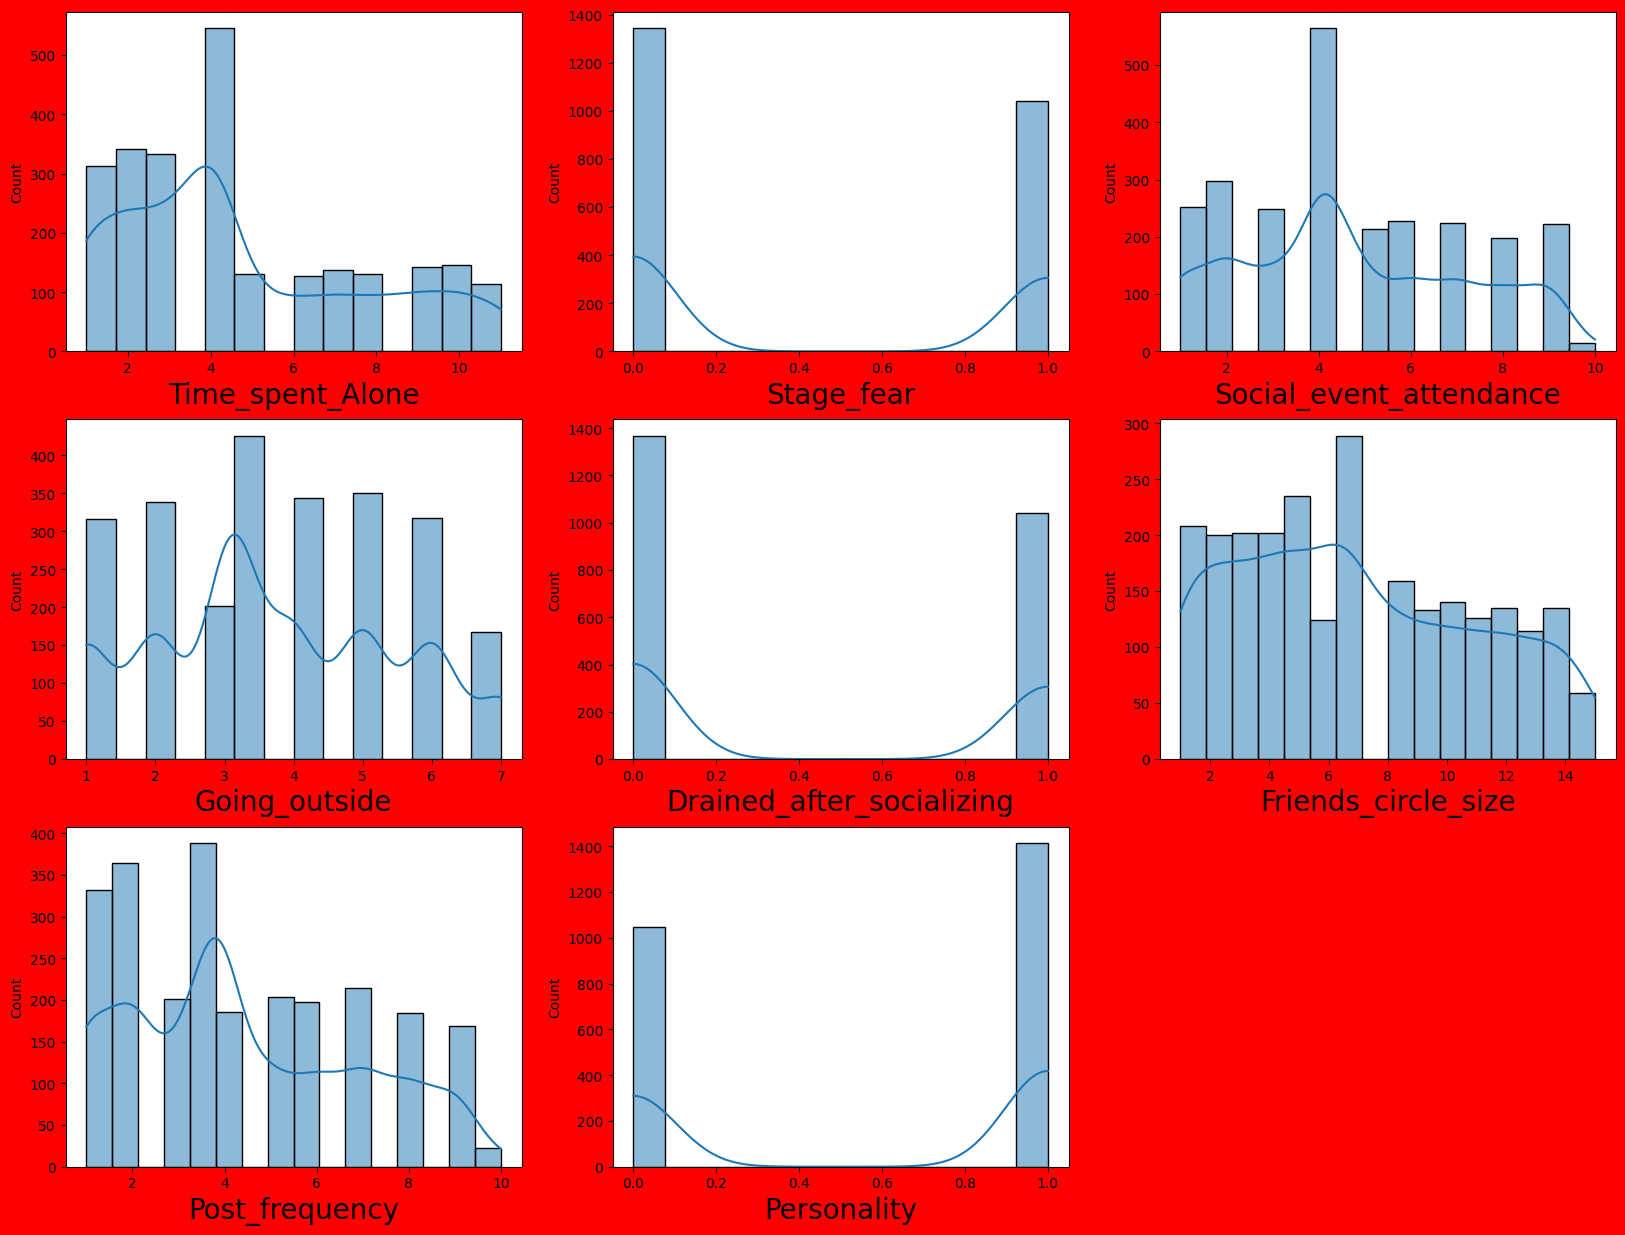

In [34]:
### 5. Exploratory Data Analysis (EDA)
# Distribution Plots:**
# Use `sns.histplot()` or `sns.kdeplot()` to check how each feature is distributed.
# Helps understand skewness and variability.


plt.figure(figsize=(20, 15), facecolor='red')
plotnumber = 1

for column in numeric_columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column], kde=True)  # Use histplot instead of deprecated distplot
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.show()

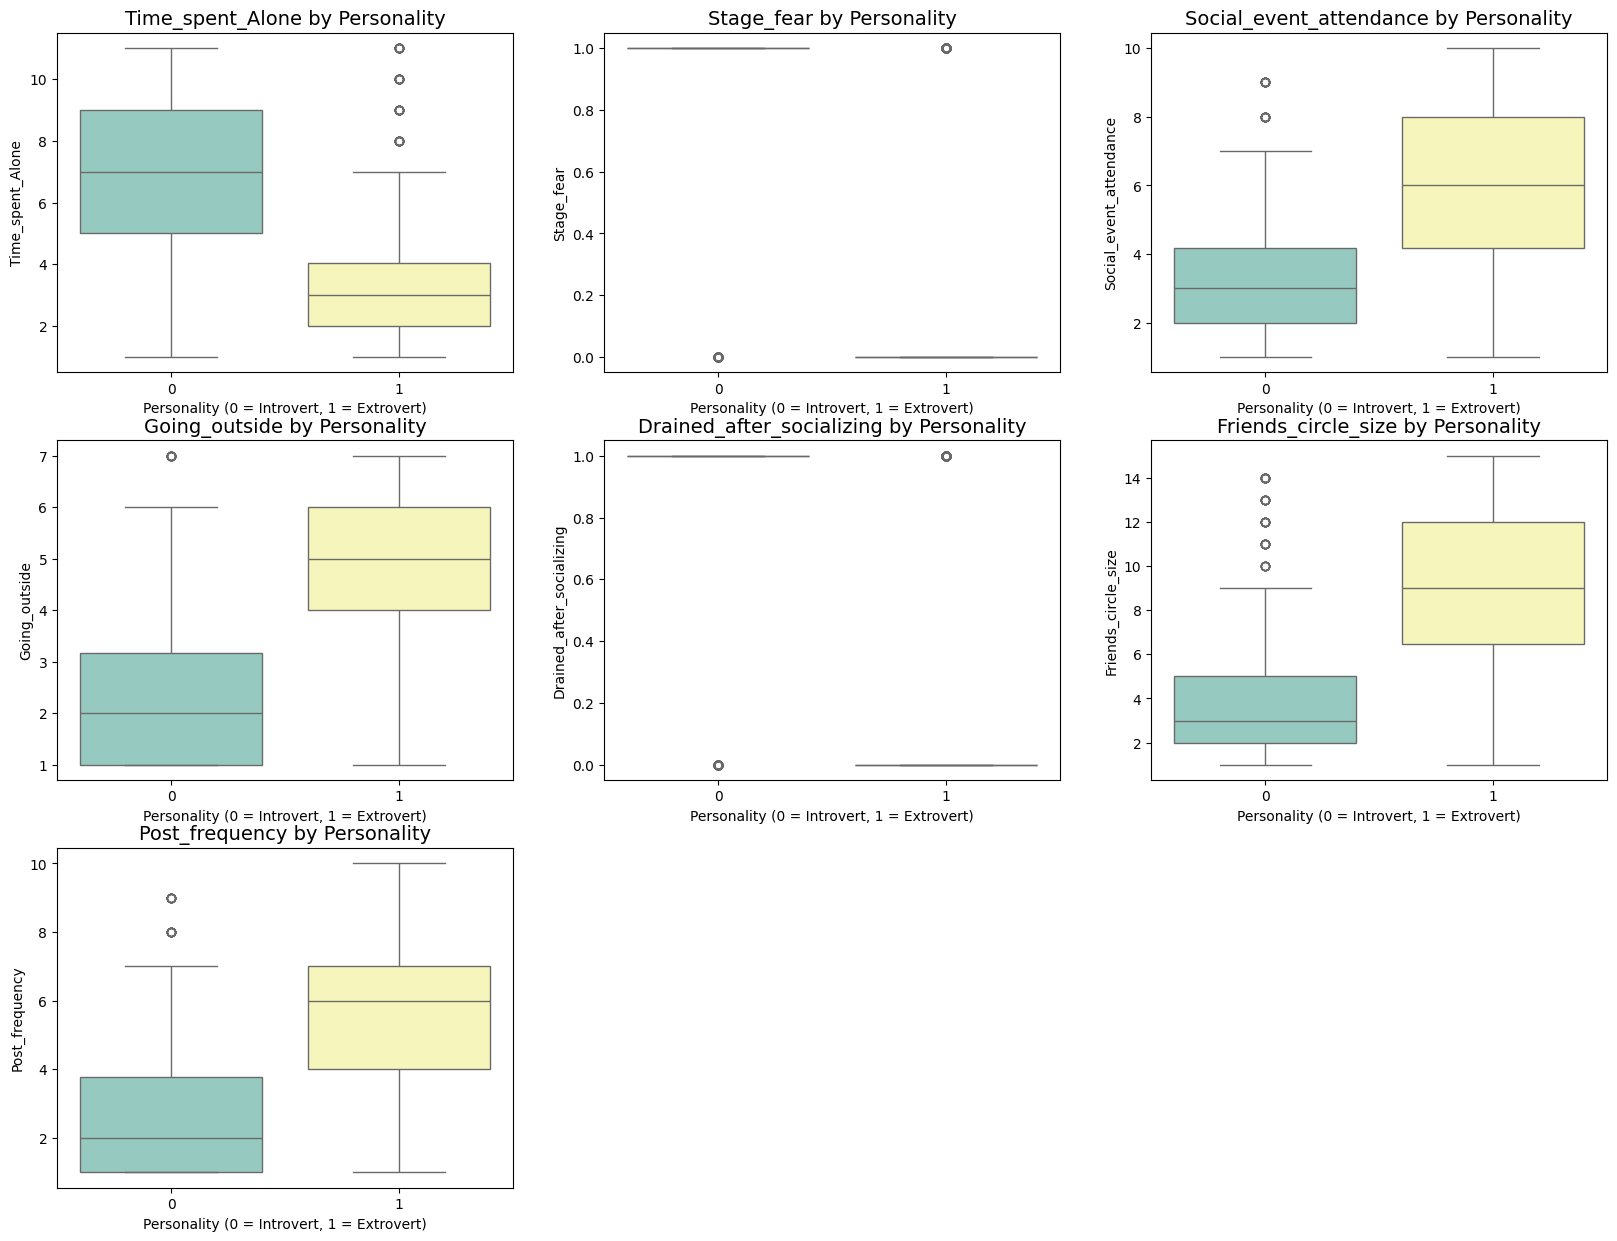

In [35]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in X.columns:
    if plotnumber <= 9:
        plt.subplot(3, 3, plotnumber)
        sns.boxplot(x='Personality', y=column, data=data, palette='Set3')
        plt.title(f'{column} by Personality', fontsize=14)
        plt.xlabel('Personality (0 = Introvert, 1 = Extrovert)')
        plt.ylabel(column)
        plotnumber += 1
plt.show()

In [36]:
#1st quantile 
q1=data.quantile(0.25)

In [37]:
#3rd quantile
q3=data.quantile(0.75)

In [38]:
print(q1)
print(q3)
print(IQR)

Time_spent_Alone             2.0
Stage_fear                   0.0
Social_event_attendance      3.0
Going_outside                2.0
Drained_after_socializing    0.0
Friends_circle_size          4.0
Post_frequency               2.0
Personality                  0.0
Name: 0.25, dtype: float64
Time_spent_Alone              7.0
Stage_fear                    1.0
Social_event_attendance       7.0
Going_outside                 5.0
Drained_after_socializing     1.0
Friends_circle_size          10.0
Post_frequency                6.0
Personality                   1.0
Name: 0.75, dtype: float64


NameError: name 'IQR' is not defined

In [39]:
q1 = data['Time_spent_Alone'].quantile(0.25)
q3 = data['Time_spent_Alone'].quantile(0.75)
IQR = q3 - q1

Time_spent_Alone_high = q3 + (1.5 * IQR)
Time_spent_Alone_low = q1 - (1.5 * IQR)

print("Upper Bound:", Time_spent_Alone_high)
print("Lower Bound:", Time_spent_Alone_low)

Upper Bound: 14.5
Lower Bound: -5.5


In [40]:
index = np.where(data['Time_spent_Alone'] > Time_spent_Alone_high)

index

(array([], dtype=int64),)

In [41]:
q1 = data['Social_event_attendance'].quantile(0.25)
q3 = data['Social_event_attendance'].quantile(0.75)
IQR = q3 - q1

Social_event_attendance_high = q3 + (1.5 * IQR)
Social_event_attendance_low = q1 - (1.5 * IQR)

print("Upper Bound:", Social_event_attendance_high)
print("Lower Bound:", Social_event_attendance_low)

Upper Bound: 13.0
Lower Bound: -3.0


In [42]:
index = np.where(data['Social_event_attendance'] > Social_event_attendance_high)

index

(array([], dtype=int64),)

In [43]:

q1 = data['Going_outside'].quantile(0.25)
q3 = data['Going_outside'].quantile(0.75)
IQR = q3 - q1

Going_outside_high = q3 + (1.5 * IQR)
Going_outside_low = q1 - (1.5 * IQR)

print("Upper Bound:", Going_outside_high)
print("Lower Bound:", Going_outside_low)

Upper Bound: 9.5
Lower Bound: -2.5


In [44]:

index = np.where(data['Going_outside'] > Going_outside_high)

index


(array([], dtype=int64),)

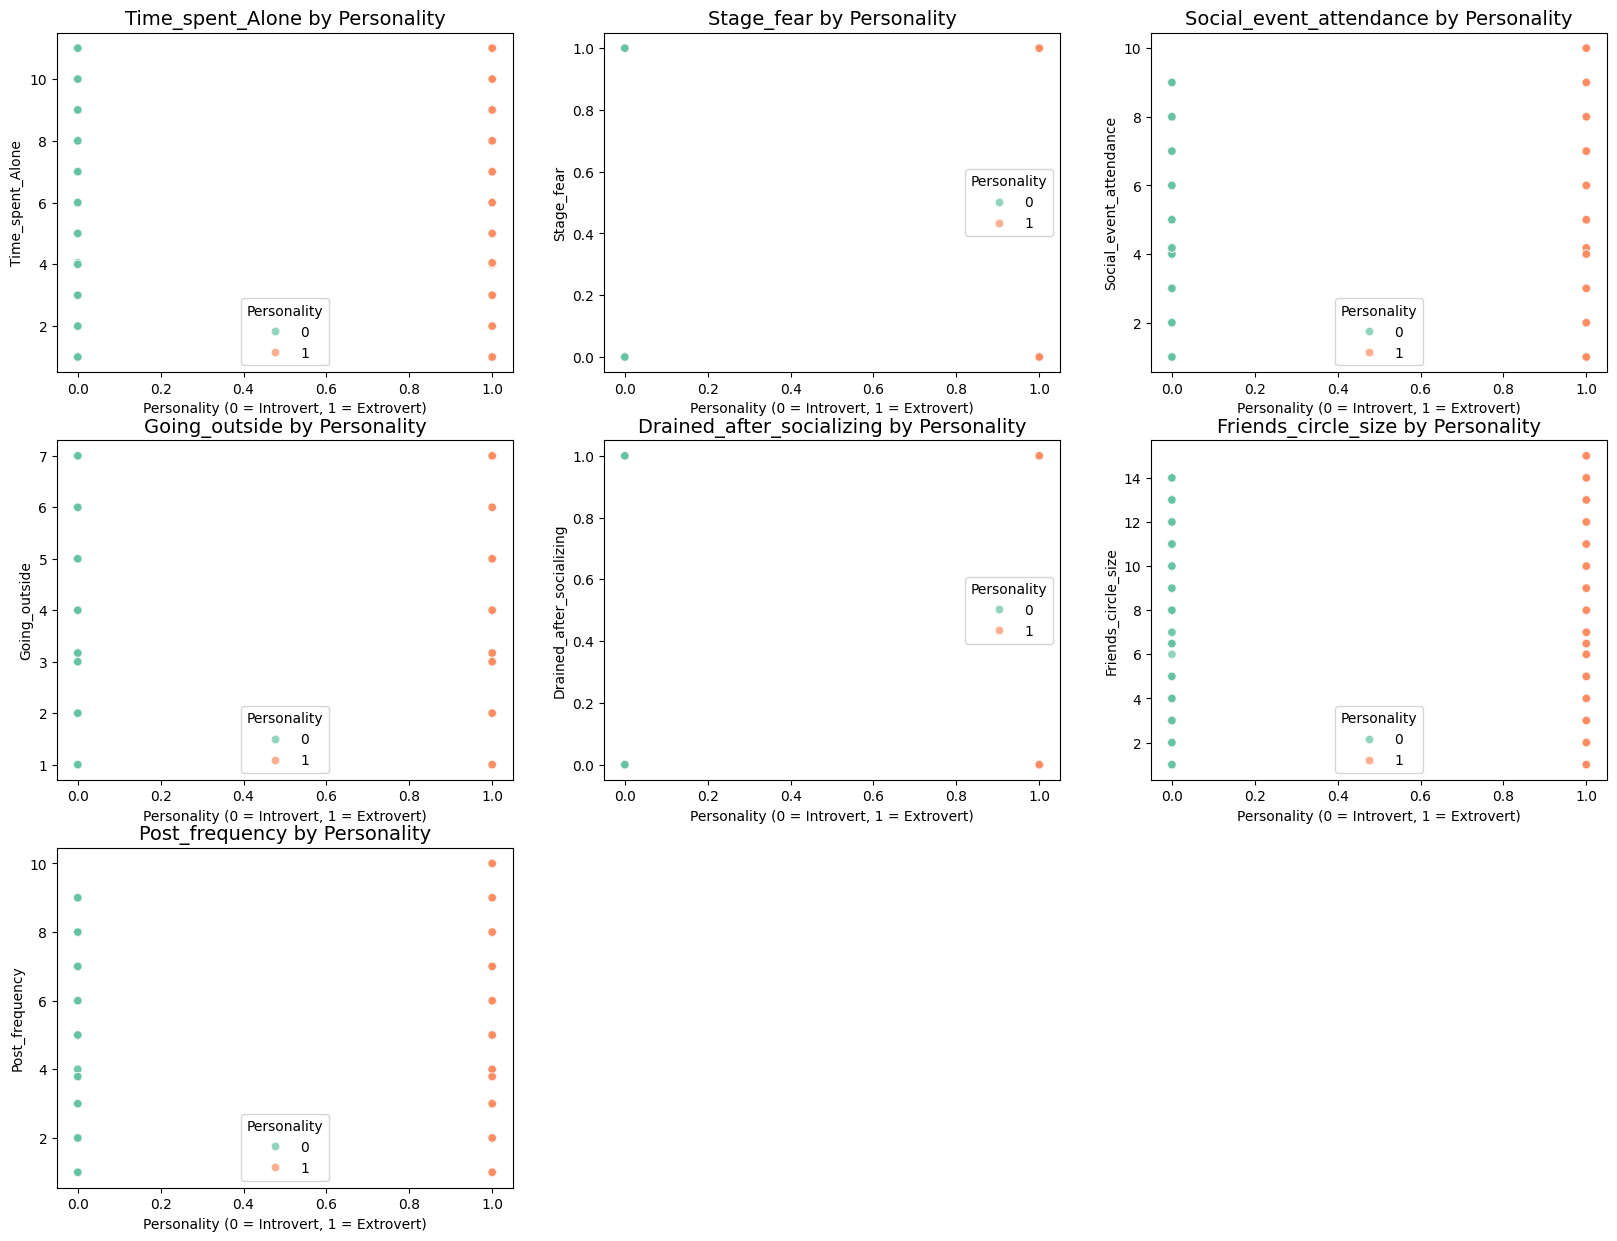

In [45]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in X.columns:
    if plotnumber <= 9:
        plt.subplot(3, 3, plotnumber)
        sns.scatterplot(
            x='Personality', 
            y=column, 
            data=data, 
            hue='Personality', 
            palette='Set2',
            alpha=0.7
        )
        plt.title(f'{column} by Personality', fontsize=14)
        plt.xlabel('Personality (0 = Introvert, 1 = Extrovert)')
        plt.ylabel(column)
        plotnumber += 1
plt.show()

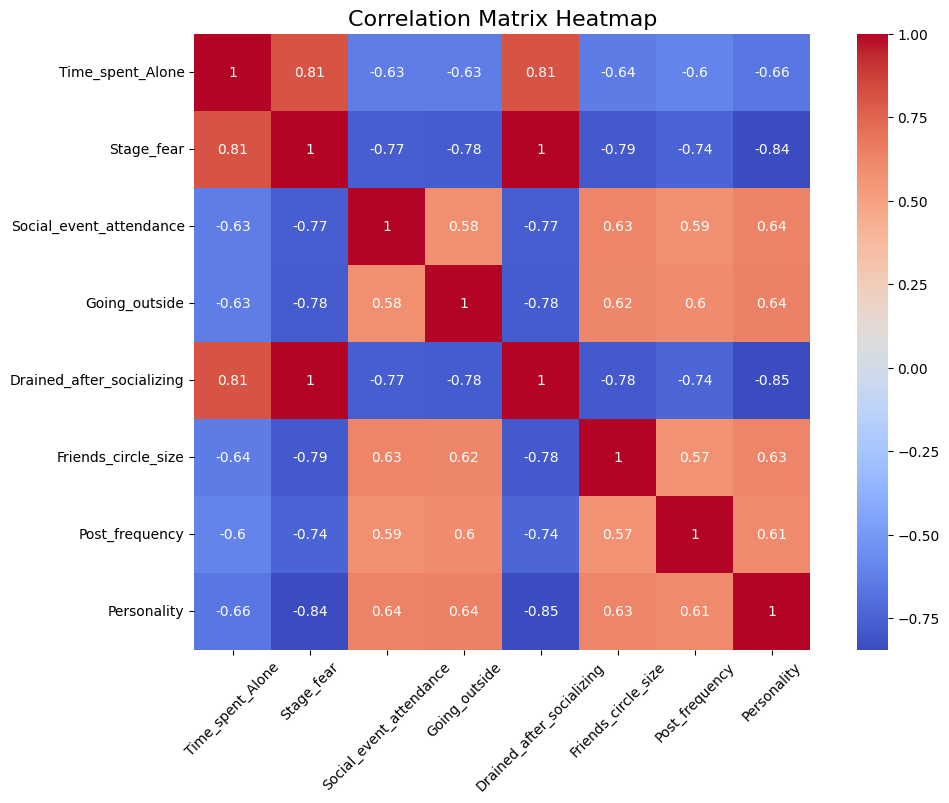

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data.corr()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot heatmap
sns.heatmap(corr_matrix, 
            annot=True,         # show correlation coefficients
            cmap='coolwarm',    # color map
            square=True)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

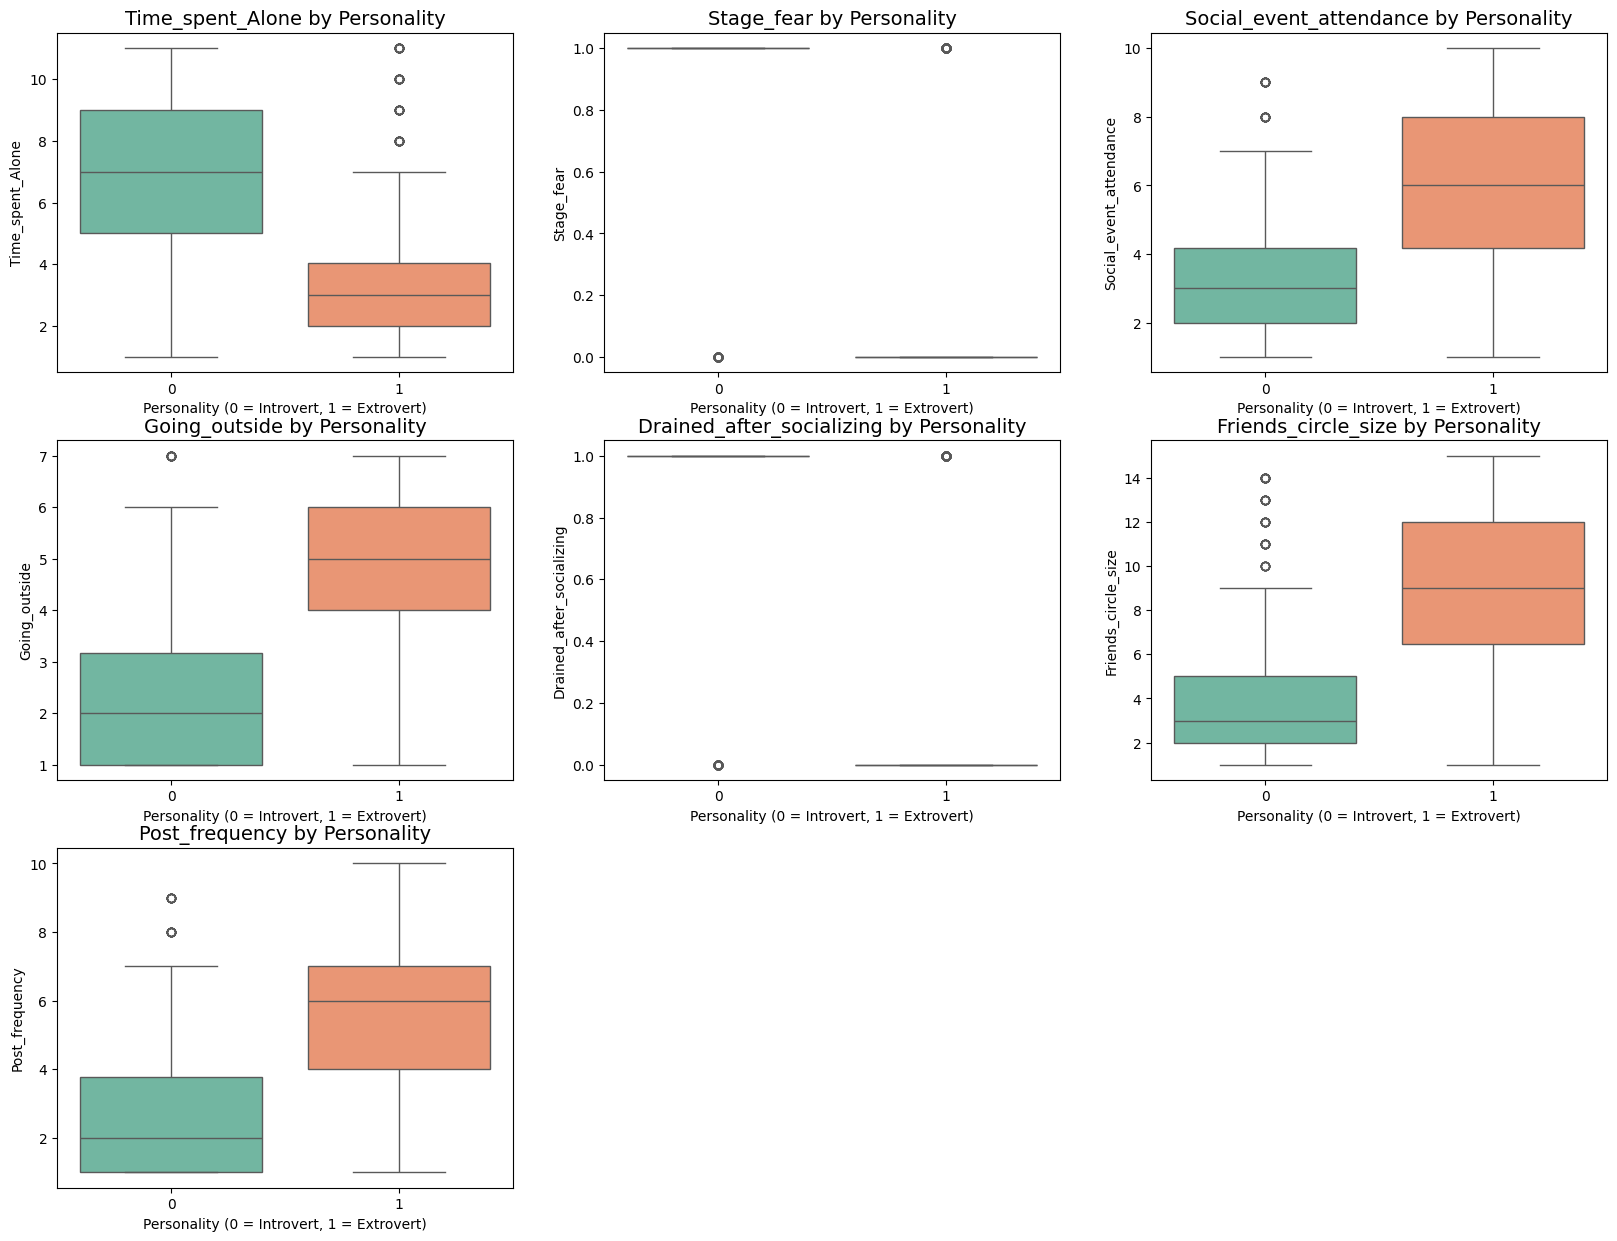

In [47]:

plt.figure(figsize=(20, 15))
plotnumber = 1

for column in data.drop('Personality', axis=1).columns:
    if plotnumber <= 9:
        plt.subplot(3, 3, plotnumber)
        sns.boxplot(x='Personality', y=column, data=data, palette='Set2')
        plt.title(f'{column} by Personality', fontsize=14)
        plt.xlabel('Personality (0 = Introvert, 1 = Extrovert)')
        plt.ylabel(column)
        plotnumber += 1
plt.show()

In [58]:
x = data.drop('Personality', axis=1)
y = data['Personality']


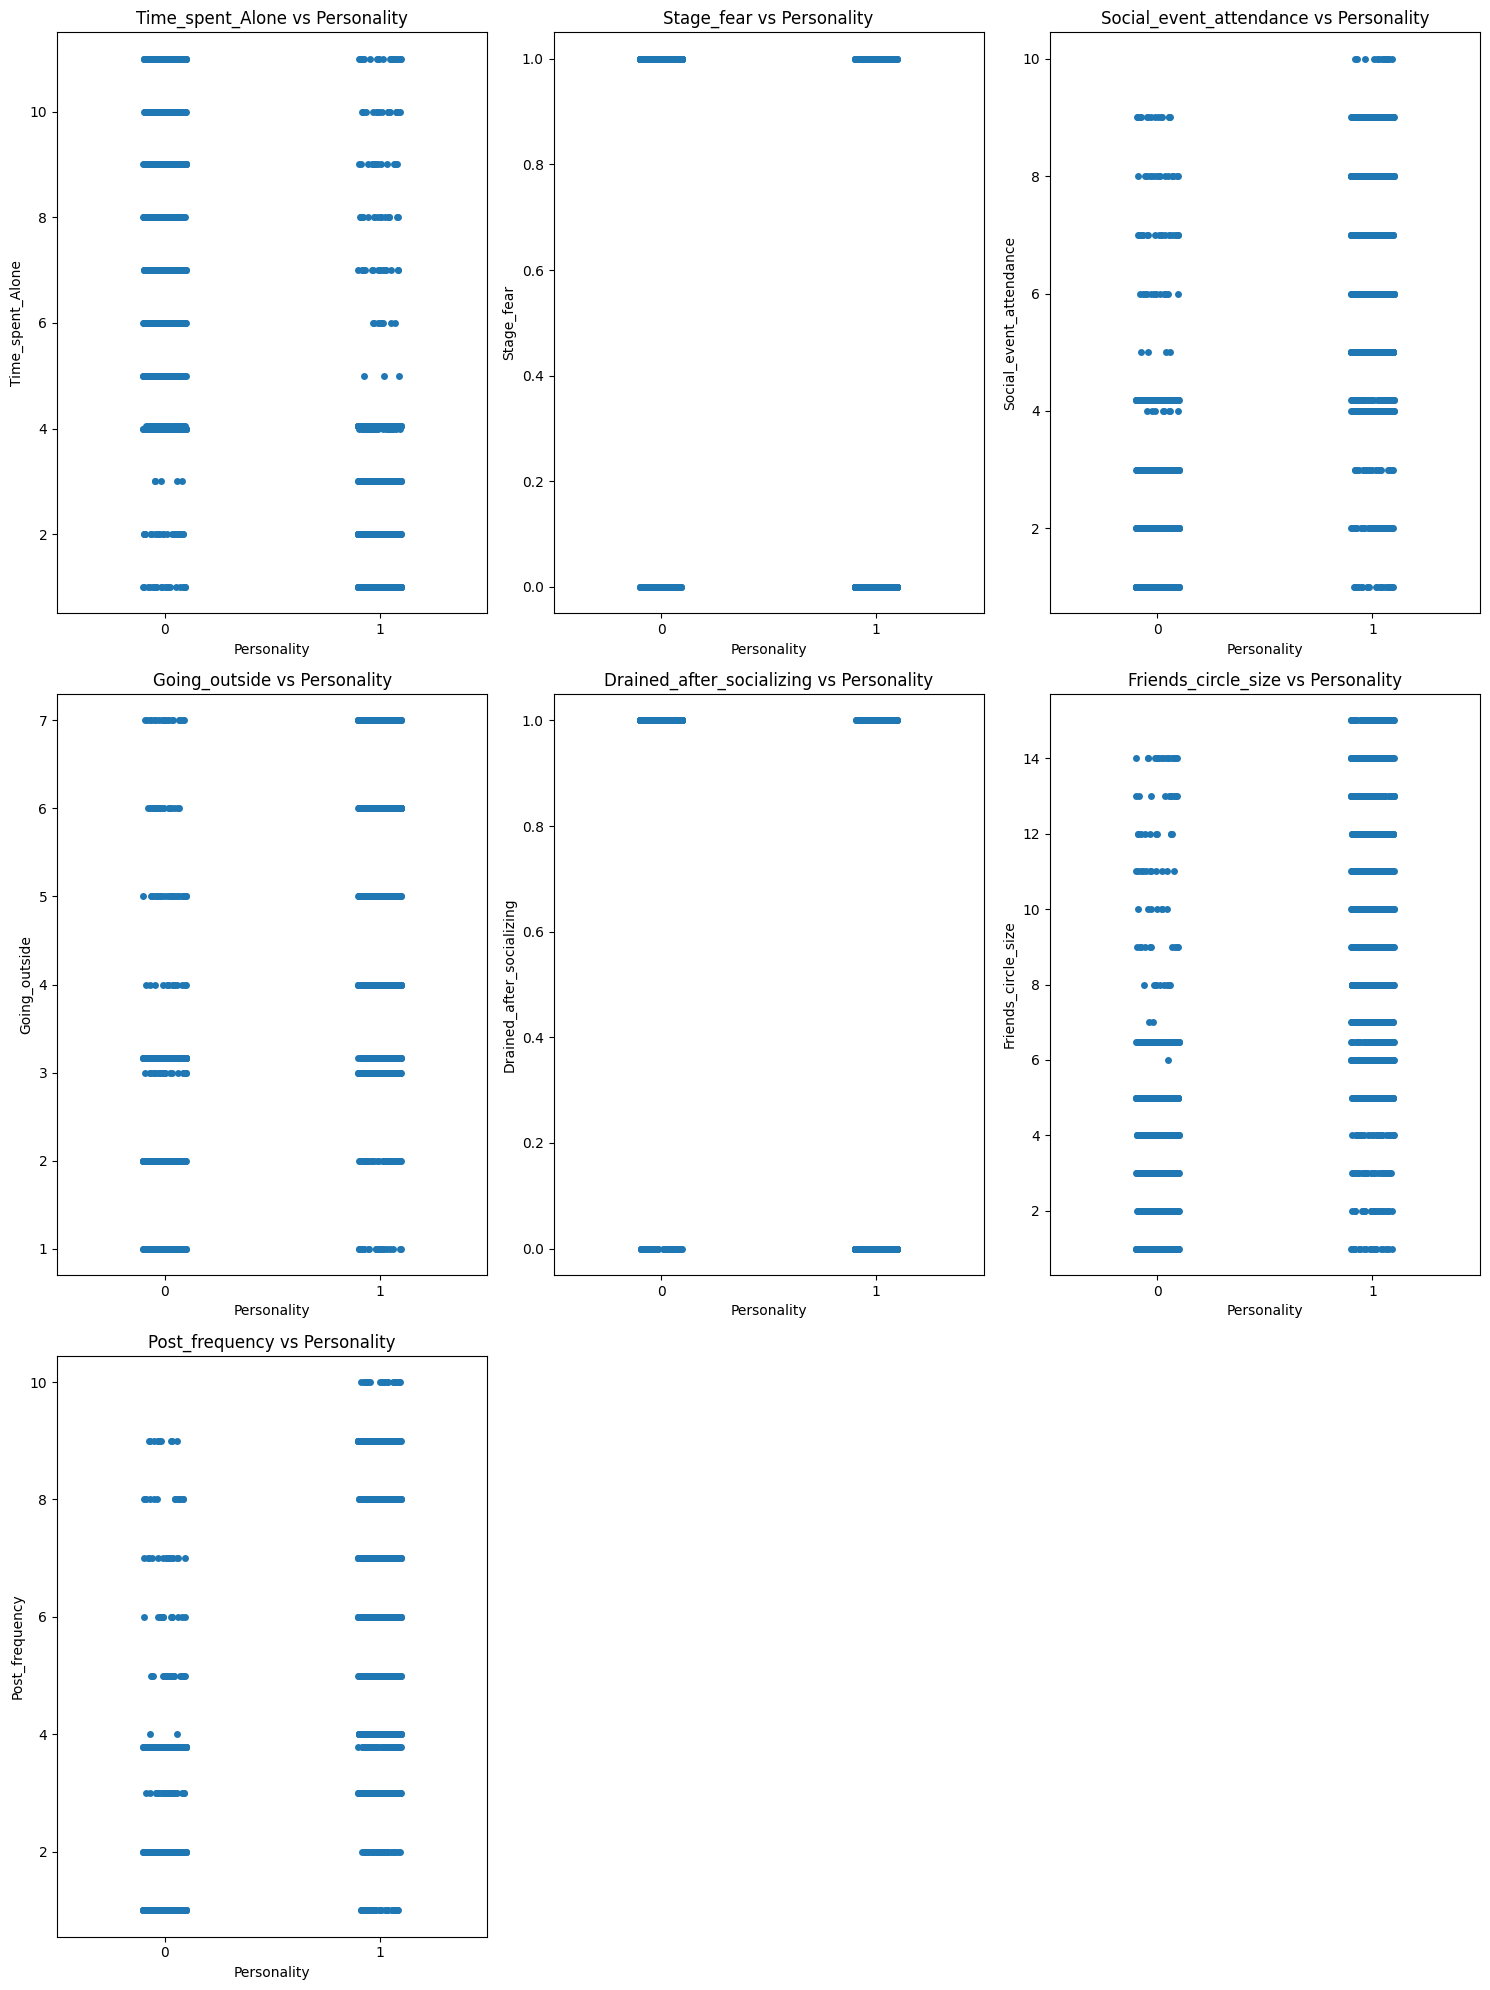

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))
plotnumber = 1

# Only plot numeric columns to avoid errors
for column in x.select_dtypes(include='number').columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.stripplot(x=y, y=x[column], ax=ax, jitter=True)
        ax.set_title(f'{column} vs Personality')
        ax.set_xlabel('Personality')
        ax.set_ylabel(column)
        plotnumber += 1

plt.tight_layout()
plt.show()


In [60]:
x=data.drop(columns=['Personality'])

y=data.Personality

In [62]:
from sklearn.preprocessing import StandardScaler

# Drop the target column (Personality) for scaling
X = data.drop('Personality', axis=1)

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [64]:
import numpy as np

# Check for NaNs
print("NaN values:\n", X_scaled_df.isna().sum())

# Check for infinite values
print("\nInfinite values:\n", np.isinf(X_scaled_df).sum())


NaN values:
 Time_spent_Alone              0
Stage_fear                   73
Social_event_attendance       0
Going_outside                 0
Drained_after_socializing    51
Friends_circle_size           0
Post_frequency                0
dtype: int64

Infinite values:
 Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64


In [65]:
X_scaled_df = X_scaled_df.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
X_scaled_df = X_scaled_df.dropna()  # Drop rows with NaN


In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i)
                   for i in range(X_scaled_df.shape[1])]

print(vif_data)


                     Feature           VIF
0           Time_spent_Alone      2.944382
1                 Stage_fear  10581.681147
2    Social_event_attendance      2.493857
3              Going_outside      2.564416
4  Drained_after_socializing  10579.374394
5        Friends_circle_size      2.606507
6             Post_frequency      2.194294


In [67]:
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.25,random_state=355)

In [68]:
log_reg=LogisticRegression()

In [71]:
from sklearn.impute import SimpleImputer

# Replace missing values with mean of each column
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)


In [72]:
log_reg.fit(x_train_imputed, y_train)


LogisticRegression()

In [74]:
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]  # ensure alignment

log_reg.fit(x_train, y_train)


LogisticRegression()

In [77]:
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)
log_reg.fit(x_train_imputed, y_train)


LogisticRegression()

In [78]:
y_pred = log_reg.predict(x_test_imputed)
print(y_pred)


[0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1
 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1
 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0
 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1
 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0
 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1
 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 0 0 1 0 0 

In [79]:
#Model Accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

In [80]:
confusion_matrix(y_test,y_pred)

array([[256,   0],
       [  0, 360]], dtype=int64)